In [ ]:
# импорт библиотеки pandas
import pandas as pd

### Read

#### Upload files

In [ ]:
# загрузка файлов с компьютера (sample_1.csv, sample_2.csv, sample_3.txt, PS.csv, power_generation.csv)
from google.colab import files # files sample1, sample2, sample3, PS, power_generation https://drive.google.com/drive/folders/1u8MfVG13bgZLq9lvEEgVOpEHOUVyE_86?usp=sharing
uploaded = files.upload()

Saving power_generation.csv to power_generation (2).csv
Saving PS.csv to PS (2).csv
Saving sample_1.csv to sample_1 (2).csv
Saving sample_2.csv to sample_2 (2).csv
Saving sample_3.txt to sample_3 (2).txt
Saving sample_33.txt to sample_33.txt


#### Read CSV

In [ ]:
# чтение файла (датафрейма)
input_df = pd.read_csv('sample_1.csv')
# отображение датафрейма
input_df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,10.0,20.0,30.0,40.0
2,0.1,0.2,0.3,0.4


#### Statistical

In [ ]:
# метод describe() для численных данных в датафрейме выводит основное статистическое описание  по столбцам (сериям)
# count - количество ненулевых (non-NA/null) значений
# mean - среднее значение
# std - стандартное отклонение
# min - минимальное значение
# 25% - первый (нижний) квантиль
# 50% - второй квантиль (медиана)
# 75% - третий (верхний) квантиль
# max - максимальное значение
input_df.describe()

,A,B,C,D
count,3.000000,3.000000,3.000000,3.000000
mean,3.700000,7.400000,11.100000,14.800000
std,5.474486,10.948973,16.423459,21.897945
min,0.100000,0.200000,0.300000,0.400000
25%,0.550000,1.100000,1.650000,2.200000
50%,1.000000,2.000000,3.000000,4.000000
75%,5.500000,11.000000,16.500000,22.000000
max,10.000000,20.000000,30.000000,40.000000


In [ ]:
# метод agg() позволяет для указанных столбцов (серий) вывести требуемую информацию
# также аналогично можно использовать методы: min, max, count и тд.
input_df.agg({'A': ['median', 'mean', 'std'],
                'B': ['median', 'mean', 'std']})

,A,B
median,1.000000,2.000000
mean,3.700000,7.400000
std,5.474486,10.948973


In [ ]:
# метод min() выводит минимальные значения для каждого столбца (серии) и тип данных
# также аналогично можно использовать методы: max, std, mean, count и тд.
input_df.min()

A    0.1
B    0.2
C    0.3
D    0.4
dtype: float64

#### Read arguments

In [ ]:
# ошибка чтения файла из-за отсутствия разделителей в исходном датафрейме
input_df = pd.read_csv('sample_2.csv')
input_df

ParserError: ignored

#### Column separator

In [ ]:
# чтение исходного датафрейма с явным указанием разделителя столбцов (серий) (в случае отсутствия разделителей применяется sep = '\t')
input_df = pd.read_csv('sample_2.csv', sep = '\t')
# отображение датафрейма
input_df

,1,2,3,4
0,10,20,30,40
1,"0,1","0,2","0,3","0,4"


In [ ]:
# метод describe() выводит основное статистичское описание данных, в данном случае из-за разделителя "," 
# в числах данные имеют тип "строка", а не численное значение (int или float)
# unique - кол-во уникальных значений в серии
# top - самое распространенное значение в серии
# freq - это частота (кол-во) наиболее распространенного значения в серии
input_df.describe()

,1,2,3,4
count,2,2,2,2
unique,2,2,2,2
top,10,"0,2",30,40
freq,1,1,1,1


#### Table header

In [ ]:
# чтение исходного датафрейма с явным указанием разделителя столбцов(серий) (sep = '/t') и явным указанием сброса заголовка (header = None)
# чтобы данные из первой строки в датафрейме не стали заголовком, а оставались первой строкой датафрейма
input_df = pd.read_csv('sample_2.csv', sep = '\t', header = None)
# отображение датафрейма
input_df

,0,1,2,3
0,1,2,3,4
1,10,20,30,40
2,"0,1","0,2","0,3","0,4"


In [ ]:
# метод describe() выводит основное статистичское описание данных, в данном случае из-за разделителя ","
# в числах данные имеют тип данных "строка", а не численное значение (int или float)
# unique - кол-во уникальных значений в серии
# top - самое распространенное значение в серии
# freq - это частота (кол-во) наиболее распространенного значения в серии
input_df.describe()

,0,1,2,3
count,3,3,3,3
unique,3,3,3,3
top,1,"0,2",3,4
freq,1,1,1,1


#### Decimal separator

In [ ]:
# чтение исходного датафрейма с явным указанием разделителя столбцов(серий) (sep = '/t') и явным указанием сброса заголовка (header = None)
# чтобы данные из первой строки в датафрейме не стали заголовком, а оставались первой строкой датафрейма
# также с явным указанием разделителя "внутри" чисел(по умолчанию разделитель '.'), если в исходных данных используется ',' 
# то для корректного чтения данных необходимо указать параметр (decimal=',')
input_df = pd.read_csv('sample_2.csv', sep = '\t', header = None, decimal=',')
# отображение датафрейма
input_df

,0,1,2,3
0,1.0,2.0,3.0,4.0
1,10.0,20.0,30.0,40.0
2,0.1,0.2,0.3,0.4


In [ ]:
# метод describe() для численных данных в датафрейме выводит основное статистическое описание  по столбцам (сериям)
# count - количество ненулевых (non-NA/null) значений
# mean - среднее значение
# std - стандартное отклонение
# min - минимальное значение
# 25% - первый (нижний) квантиль
# 50% - второй квантиль (медиана)
# 75% - третий (верхний) квантиль
# max - максимальное значение
input_df.describe()

,0,1,2,3
count,3.000000,3.000000,3.000000,3.000000
mean,3.700000,7.400000,11.100000,14.800000
std,5.474486,10.948973,16.423459,21.897945
min,0.100000,0.200000,0.300000,0.400000
25%,0.550000,1.100000,1.650000,2.200000
50%,1.000000,2.000000,3.000000,4.000000
75%,5.500000,11.000000,16.500000,22.000000
max,10.000000,20.000000,30.000000,40.000000


#### Column names

In [ ]:
# чтение датафрейма с явным указанием разделителей столбцов, сбросом заголовка, и явным указанием разделителя в численных значениях
# с присвоением новых имен для столбцов (серий) параметром (names=['A', 'B', 'C', 'D']) 
input_df = pd.read_csv('sample_2.csv', sep = '\t', header = None, decimal=',', names=['A', 'B', 'C', 'D'])
# отображение датафрейма
input_df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,10.0,20.0,30.0,40.0
2,0.1,0.2,0.3,0.4


In [ ]:
# чтение датафрейма с явным указанием разделителя столбцов ';'
input_df = pd.read_csv('sample_3.txt', sep = ';')
# отображение датафрейма
input_df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,10.0,20.0,30.0,40.0
2,0.1,0.2,0.3,0.4


#### Row names (indexes)

In [ ]:
# чтение файла, с разделителем столбцов ';' и индексами равными данным в первом столбце (столбец имеющий индекс 0)
input_df = pd.read_csv('sample_33.txt', sep = ';', index_col = 0)
# отображение датафрейма
input_df

,A,B,C,D
a,1.0,2.0,3.0,4.0
b,10.0,20.0,30.0,40.0
c,0.1,0.2,0.3,0.4


#### Read only n-first rows

In [ ]:
# чтение файла, с разделителем столбцов ';' и индексами равными данным в первом столбце (столбец имеющий индекс 0)
# параметр (nrows = 1) указывает на количество строк, которые необходимо считать
input_df = pd.read_csv('sample_33.txt', sep = ';', index_col = 0,  nrows = 1) 
# отображение датафрейма
input_df

,A,B,C,D
a,1,2,3,4


#### Read from Google Drive link

In [ ]:
# чтение данных в формате csv по ссылке с Google Drive (с указанием разделителя стобцов ',')
url = "https://drive.google.com/uc?export=download&id=1ONRAHlUj9du5ikkdfSqRgxXZcLdA_Xhz" # access permition!
input_df = pd.read_csv(url, sep = ',')
# отображение датафрейма
input_df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,10.0,20.0,30.0,40.0
2,0.1,0.2,0.3,0.4


In [ ]:
# чтение данных в формате excel по ссылке с Google Drive (cо сбросом заголовка)
input_df = pd.read_excel('https://drive.google.com/uc?export=download&id=15wO7GfElei68HqHITyuWo3NQiqsUd38_', header = None)
# отображение датафрейма
input_df

,0,1,2
0,01.01.2015 0:30:00,1463.0,1776.5
1,01.01.2015 1:00:00,1452.0,1765.5
2,01.01.2015 1:30:00,1391.5,1699.5
3,01.01.2015 2:00:00,1435.5,1749.0
4,01.01.2015 2:30:00,1435.5,1749.0
...,...,...,...
70123,31.12.2018 22:00:00,1762.0,2220.0
70124,31.12.2018 22:30:00,1679.0,2148.0
70125,31.12.2018 23:00:00,1819.0,2253.0
70126,31.12.2018 23:30:00,1566.0,2035.0


#### Mount Google Drive

In [ ]:
# подключение Google Disk для работы с файлами хранящимися на нём
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# чтение csv файла с google disk
input_df = pd.read_csv('gdrive/My Drive/Pandas/sample_1.csv')
# отображение датафрейма
input_df

# 'gdrive/My Drive/Халясмаа/08.2020/data/sample_1.csv'

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,10.0,20.0,30.0,40.0
2,0.1,0.2,0.3,0.4


In [ ]:
# чтение excel файла с google disk
input_df = pd.read_excel('gdrive/My Drive/Pandas/Industrial_consumption.xlsx')

# 'gdrive/My Drive/Халясмаа/08.2020/data/Industrial_consumption.xlsx'

In [ ]:
# отображение датафрейма
input_df

,01.01.2015 0:30:00,1463,1776.5
0,01.01.2015 1:00:00,1452.0,1765.5
1,01.01.2015 1:30:00,1391.5,1699.5
2,01.01.2015 2:00:00,1435.5,1749.0
3,01.01.2015 2:30:00,1435.5,1749.0
4,01.01.2015 3:00:00,1408.0,1716.0
...,...,...,...
70122,31.12.2018 22:00:00,1762.0,2220.0
70123,31.12.2018 22:30:00,1679.0,2148.0
70124,31.12.2018 23:00:00,1819.0,2253.0
70125,31.12.2018 23:30:00,1566.0,2035.0


#### Add column names after reading

In [ ]:
# подготовка данных в датафрейме, в случае, если первая строка оказалась в заголовке

# создание списка с будущими названиями заголовка (столбцов, серий)
column_names = ['Timestamp', 'Consumer_1', 'Consumer_2']

# значения, попавшую в заголовок запоминаем во временную переменную
tmp_first_row = input_df.columns

# создание датафрейма из временной переменной
tmp_first_row_df = pd.DataFrame([tmp_first_row])

# присвоение новому датафрейму заголовка исходного датафрейма, для дальнешейго объединения
tmp_first_row_df.columns = input_df.columns

# добавление к новому датафрейму исходного методом append
proc_df = tmp_first_row_df.append(input_df)

# присвоение новых имен заголовку нового датафрейма 
proc_df.columns = column_names

# отображение полученного датафрейма
proc_df

,Timestamp,Consumer_1,Consumer_2
0,01.01.2015 0:30:00,1463.0,1776.5
0,01.01.2015 1:00:00,1452.0,1765.5
1,01.01.2015 1:30:00,1391.5,1699.5
2,01.01.2015 2:00:00,1435.5,1749.0
3,01.01.2015 2:30:00,1435.5,1749.0
...,...,...,...
70122,31.12.2018 22:00:00,1762.0,2220.0
70123,31.12.2018 22:30:00,1679.0,2148.0
70124,31.12.2018 23:00:00,1819.0,2253.0
70125,31.12.2018 23:30:00,1566.0,2035.0


In [ ]:
# создание датафрейма с заданными столбцами и значениями
df_1= pd.DataFrame({
    'A': [1, 3, 5],
    'B': [66, 32, 51],
})

# конвертация датафрема в массив (numpy array)
df_1.to_numpy()

array([[ 1, 66],
       [ 3, 32],
       [ 5, 51]])

#### Web-scraping

In [ ]:
# чтение по ссылке HTML-таблиц в список объектов датафрейма, с соотвествующим обращением к элементу списка [i]
input_df = pd.read_html('https://en.wikipedia.org/wiki/Solar_power')[1]
# отображение датафрейма
input_df

Solar Electricity Generation  ...                              
                            Year  ...                    % of Total
0                           2004  ...                         0.01%
1                           2005  ...                         0.02%
2                           2006  ...                         0.03%
3                           2007  ...                         0.03%
4                           2008  ...                         0.06%
5                           2009  ...                         0.10%
6                           2010  ...                         0.15%
7                           2011  ...                         0.27%
8                           2012  ...                         0.43%
9                           2013  ...                         0.58%
10                          2014  ...                         0.79%
11                          2015  ...                         1.05%
12                          2016  ...                         1.31%
13                          2017  ...                         1.73%
14                          2019  ...                         2.68%
15  Sources:[32][33][34][35][36]  ...  Sources:[32][33][34][35][36]

[16 rows x 3 columns]

#### Column types

In [ ]:
# чтение по ссылке HTML-таблиц в список объектов датафрейма, с соотвествующим обращением к элементу списка [i]
url = "https://en.wikipedia.org/wiki/List_of_photovoltaics_companies"
input_df = pd.read_html(url)[7]
# отображение датафрейма
input_df

,Solar cellcompany,Country,Shipment2009 in MW,Shipment2010 in MW
0,Suntech,China,704,1572
1,JA Solar,China,520,1464
2,First Solar,USA,1100,1411
3,Yingli Solar,China,525,1062
4,Trina Solar,China,399,1057
5,Motech Solar,Taiwan,360,924
6,Q-Cells,Germany,586,907
7,Gintech,Taiwan,368,827
8,Sharp,Japan,595,774
9,Sungen Solar,China,193,588


In [ ]:
# сортировка значений методом sort_values с указанным столбцом, по значениям которого необходимо отсортировать весь датафрейм (по возрастанию)
# в данном случае сортировка численных значений в столбце 'Shipment2009 in MW' не совсем корректна, поскольку значения имеют формат "строка"
sorted_df = input_df.sort_values('Shipment2009 in MW')
# отображение датафрейма
sorted_df

,Solar cellcompany,Country,Shipment2009 in MW,Shipment2010 in MW
2,First Solar,USA,1100,1411
9,Sungen Solar,China,193,588
5,Motech Solar,Taiwan,360,924
7,Gintech,Taiwan,368,827
4,Trina Solar,China,399,1057
1,JA Solar,China,520,1464
3,Yingli Solar,China,525,1062
6,Q-Cells,Germany,586,907
8,Sharp,Japan,595,774
0,Suntech,China,704,1572


In [ ]:
# метод dtypes отображает типы данных в столбцах
# основные типы данных:
# float - float64 (числа с плавающей точкой)
# int - int64 (целые числа)
# datetime - datetime64[ns] (дата)
# string - object (строки)
input_df.dtypes

Solar cellcompany     object
Country               object
Shipment2009 in MW    object
Shipment2010 in MW    object
dtype: object

In [ ]:
# преобразование датафрейма, путём удаления последней строки не имеющей отношения к содержимому датафрейма, методом drop
proc_df = input_df.drop(input_df.tail(1).index) 
# отображение датафрейма
proc_df 

,Solar cellcompany,Country,Shipment2009 in MW,Shipment2010 in MW
0,Suntech,China,704,1572
1,JA Solar,China,520,1464
2,First Solar,USA,1100,1411
3,Yingli Solar,China,525,1062
4,Trina Solar,China,399,1057
5,Motech Solar,Taiwan,360,924
6,Q-Cells,Germany,586,907
7,Gintech,Taiwan,368,827
8,Sharp,Japan,595,774
9,Sungen Solar,China,193,588


In [ ]:
# преобразование датафрейма, путём присвоения данным в столбце 'Shipment2009 in MW' численного типа (int) методом astype
proc_df = proc_df.astype({'Shipment2009 in MW' : 'int'})
# отображение датафрейма
proc_df

,Solar cellcompany,Country,Shipment2009 in MW,Shipment2010 in MW
0,Suntech,China,704,1572
1,JA Solar,China,520,1464
2,First Solar,USA,1100,1411
3,Yingli Solar,China,525,1062
4,Trina Solar,China,399,1057
5,Motech Solar,Taiwan,360,924
6,Q-Cells,Germany,586,907
7,Gintech,Taiwan,368,827
8,Sharp,Japan,595,774
9,Sungen Solar,China,193,588


#### Sorting

In [ ]:
# сортировка значений методом sort_values с указанным столбцом, по значениям которого необходимо отсортировать весь датафрейм (по возрастанию)
# в данном случае сортировка корректна, поскольку тип данных целочисленный (int)
proc_df.sort_values('Shipment2009 in MW')

,Solar cellcompany,Country,Shipment2009 in MW,Shipment2010 in MW
9,Sungen Solar,China,193,588
5,Motech Solar,Taiwan,360,924
7,Gintech,Taiwan,368,827
4,Trina Solar,China,399,1057
1,JA Solar,China,520,1464
3,Yingli Solar,China,525,1062
6,Q-Cells,Germany,586,907
8,Sharp,Japan,595,774
0,Suntech,China,704,1572
2,First Solar,USA,1100,1411


In [ ]:
# сортировка значений методом sort_values с указанным столбцом, и явно указанным параметром (ascending = False) для сортировки по убыванию
proc_df.sort_values('Shipment2009 in MW', ascending = False)

,Solar cellcompany,Country,Shipment2009 in MW,Shipment2010 in MW
2,First Solar,USA,1100,1411
0,Suntech,China,704,1572
8,Sharp,Japan,595,774
6,Q-Cells,Germany,586,907
3,Yingli Solar,China,525,1062
1,JA Solar,China,520,1464
4,Trina Solar,China,399,1057
7,Gintech,Taiwan,368,827
5,Motech Solar,Taiwan,360,924
9,Sungen Solar,China,193,588


In [ ]:
# сортировка значений методом sort_values с указанным столбцом, и сбросом исходных индексов параметром (ignore_index = True)
proc_df.sort_values('Shipment2009 in MW', ignore_index = True)

,Solar cellcompany,Country,Shipment2009 in MW,Shipment2010 in MW
0,Sungen Solar,China,193,588
1,Motech Solar,Taiwan,360,924
2,Gintech,Taiwan,368,827
3,Trina Solar,China,399,1057
4,JA Solar,China,520,1464
5,Yingli Solar,China,525,1062
6,Q-Cells,Germany,586,907
7,Sharp,Japan,595,774
8,Suntech,China,704,1572
9,First Solar,USA,1100,1411


In [ ]:
# отображение исходного датафрейма
proc_df

,Solar cellcompany,Country,Shipment2009 in MW,Shipment2010 in MW
0,Suntech,China,704,1572
1,JA Solar,China,520,1464
2,First Solar,USA,1100,1411
3,Yingli Solar,China,525,1062
4,Trina Solar,China,399,1057
5,Motech Solar,Taiwan,360,924
6,Q-Cells,Germany,586,907
7,Gintech,Taiwan,368,827
8,Sharp,Japan,595,774
9,Sungen Solar,China,193,588


In [ ]:
# переименование заголовка методом rename с указанием исходных названий столбцов и новых названий
proc_df = proc_df.rename(columns={"Shipment2009 in MW": "2009, MW", "Shipment2010 in MW": "2010, MW"})
# отображение датафрейма
proc_df

,Solar cellcompany,Country,"2009, MW","2010, MW"
0,Suntech,China,704,1572
1,JA Solar,China,520,1464
2,First Solar,USA,1100,1411
3,Yingli Solar,China,525,1062
4,Trina Solar,China,399,1057
5,Motech Solar,Taiwan,360,924
6,Q-Cells,Germany,586,907
7,Gintech,Taiwan,368,827
8,Sharp,Japan,595,774
9,Sungen Solar,China,193,588


In [ ]:
# метод iloc позволяет выбрать необходимую часть датафрейма по индексам строк и столбцов
# iloc[i : j, n : m] - где i, j - номера строк n, m - номера столбцов (крайняя правая граница не включена)
proc_df.iloc[2 : 5, 2 : 4]

,"2009, MW","2010, MW"
2,1100,1411
3,525,1062
4,399,1057


In [ ]:
# данный цикл позволяет построчно пройтись по всем строкам датафрейма и вывести индекс строки и/или её содержимое (в данном случае индекс и содержимое столбца 'Country')
for index, row in proc_df.iterrows():
    print(index, row['Country'])

0 China
1 China
2 USA
3 China
4 China
5 Taiwan
6 Germany
7 Taiwan
8 Japan
9 China


In [ ]:
# чтение html-таблицы по ссылке
url = "https://en.wikipedia.org/wiki/List_of_photovoltaics_companies"
input_df = pd.read_html(url)[7]
# удаление лишней строки
proc_df = input_df.drop(input_df.tail(1).index)
# преобразование числовых данных в числовой тип
proc_df = proc_df.astype({'Shipment2009 in MW' : 'int', 'Shipment2010 in MW' : 'int'})
# cортировка значений по столбцу 'Shipment2009' со сбросом нумерации индексов (ignore_index = True) с сохранением изменений применяемых к датафрейму (inplace = True)
proc_df.sort_values('Shipment2009 in MW', inplace = True, ignore_index = True)
# отображение полученного датафрейма
proc_df

,Solar cellcompany,Country,Shipment2009 in MW,Shipment2010 in MW
0,Sungen Solar,China,193,588
1,Motech Solar,Taiwan,360,924
2,Gintech,Taiwan,368,827
3,Trina Solar,China,399,1057
4,JA Solar,China,520,1464
5,Yingli Solar,China,525,1062
6,Q-Cells,Germany,586,907
7,Sharp,Japan,595,774
8,Suntech,China,704,1572
9,First Solar,USA,1100,1411


### Indexing

In [ ]:
# создание списка
list_sample = [0, 10, 20, 30, 40, 50]

In [ ]:
# индексация в python начинается с 0
# list[n] - обращение к n элементу в списке
print(list_sample[0])
print(list_sample[3])

0
30


In [ ]:
# также существует "обратная" индексация, где -1 - это последний элемент, -2 - предпоследний и тд.
print(list_sample[-1])
print(list_sample[-2])

50
40


In [ ]:
# конструкция list[i:n] позволяет сделать "срез" списка с индекса i по n (правая граница не включена)
# list[:] - срез включает весь список
print(list_sample[:])

[0, 10, 20, 30, 40, 50]


In [ ]:
# срез со 2 элемента до конца списка
print(list_sample[2:])

[20, 30, 40, 50]


In [ ]:
# срез до 3 элемента, не включая 3 элемент
print(list_sample[:3])

[0, 10, 20]


In [ ]:
# срез со 2 по 4 элемент
print(list_sample[2:4])

[20, 30]


In [ ]:
# нумерация в срезе должна идти по возрастанию, от меньшего индекса к большему, иначе в срез ничего не попадёт
print(list_sample[4:2])

[]


In [ ]:
# также возможно использование "обратных" индексов для срезов, в данном случа нумерация в срезе должна идти по возрастанию, от меньшего индекса к большему
print(list_sample[-3:-1])

[30, 40]


In [ ]:
# также возможна "смешанная" индексация, например для вывода элемента с индексом 1 до предпоследнего
print(list_sample[1:-1])

[10, 20, 30, 40]


In [ ]:
# также в срезах возможно указать "шаг" среза. list[i:n:k] - где i - начальный индекс, n - конечный, k - шаг.
# в случае list[::2] будет выводиться каждый второй элемент начиная с элемента с индексом 0
print(list_sample[::2])

[0, 20, 40]


In [ ]:
# cрез включающий в себя каждый второй элемент, начиная с элемента с индексом 1
print(list_sample[1::2])

[10, 30, 50]


In [ ]:
# при отрицательном значении шага элементы будут идти в обратном порядке, с конца списка
print(list_sample[::-1])

[50, 40, 30, 20, 10, 0]


In [ ]:
# срез каждого второго элемента, начиная с конца
print(list_sample[::-2])

[50, 30, 10]


In [ ]:
# срезы также применимы и к строкам
message = 'Hello!'
print(message[::-1])

!olleH


In [ ]:
# импорт библиотеки numpy
import numpy as np

In [ ]:
# создание массива
matrix_A = np.array([[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]])
print(matrix_A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [ ]:
# срез одного элемента массива, имеющего индекс [i, k], где i - индекс строки, k - индекс столбца (нумерация начинается с 0)
print(matrix_A[1, 1])

5


In [ ]:
# срез элементов массива: столбца с индексом 1
print(matrix_A[:, 1])

[1 5 9]


In [ ]:
# срез элементов массива: строки с индексом 1
print(matrix_A[1])

[4 5 6 7]


In [ ]:
# срез массива в обратном порядке, где первая строка стала последней и первый столбец последним
print(matrix_A[::-1,::-1])

[[11 10  9  8]
 [ 7  6  5  4]
 [ 3  2  1  0]]


In [ ]:
# срез в обратном порядке строк с 1 по 3 столбец массива (не включая правую границу)
print(matrix_A[::-1, 1:3])

[[ 9 10]
 [ 5  6]
 [ 1  2]]


### Selection

In [ ]:
# чтение файла, с разделителем столбцов ';' и индексами равными данным в первом столбце (с индексом 0)
# метод head(N) выводит первые N строк датафрейма (по умолчанию 5 первых строк)
power_stations_df = pd.read_csv('PS.csv', sep = ';', index_col = 0)
power_stations_df.head()

,Begin_building,Type,Power,Owner
Name,,,,
Mutnovskaya,1988,geothermal,50,RusHydro
Pauzhetskaya,1962,geothermal,12,RusHydro
Baksan,1930,hydro,27,RusHydro
Boguchany,1974,hydro,2997,BGES
Bratsk,1954,hydro,4500,En+


#### By column name

In [ ]:
# создание из исходого датафрейма нового, который содержит только необходимые столбцы ("Type" и "Power")
tmp_df = power_stations_df[['Type', 'Power']]
# отображение датафрейма
tmp_df

,Type,Power
Name,,
Mutnovskaya,geothermal,50
Pauzhetskaya,geothermal,12
Baksan,hydro,27
Boguchany,hydro,2997
Bratsk,hydro,4500
Adygeyskaya,wind,150
Ulyanovskaya,wind,50
Leningradksaya,nuclear,4188
Kursakya,nuclear,4000


In [ ]:
# создание серии по столбцу 'Power', которая состоит из индексов (в данном случае названия) и значений мощности
# также внизу серии указывается название столбца и тип данных содержащийся в ней
tmp_df = power_stations_df.Power
# отображение серии
tmp_df

Name
Mutnovskaya         50
Pauzhetskaya        12
Baksan              27
Boguchany         2997
Bratsk            4500
Adygeyskaya        150
Ulyanovskaya        50
Leningradksaya    4188
Kursakya          4000
Smolenskaya       3000
Reftinskaya       3800
Surgut-2          5657
Kirishskaya       2595
Name: Power, dtype: int64

#### By row and column names (loc)

In [ ]:
# метод loc[] позволяет обращаться к элементам датафрейма по названиям строк или столбцов
# создание серии (среза) методом loc[] по названию  'Mutnovskaya', которая содержит в себе значения из строки с индексом 'Mutnovskaya'
tmp_df = power_stations_df.loc['Mutnovskaya']
# отображение серии
tmp_df

Begin_building          1988
Type              geothermal
Power                     50
Owner               RusHydro
Name: Mutnovskaya, dtype: object

In [ ]:
# создание датафрейма (среза) методом loc[] содержащего в себе 2 строки с названиямии 'Mutnovskaya' и 'Reftinskaya' со значениями всех столбцов
tmp_df = power_stations_df.loc[['Mutnovskaya', 'Reftinskaya']]
# отображение датафрейма
tmp_df

,Begin_building,Type,Power,Owner
Name,,,,
Mutnovskaya,1988,geothermal,50,RusHydro
Reftinskaya,1963,termal,3800,KuzEn


In [ ]:
# создание датафрейма (среза) методом loc[] содержащего в себе 2 строки 'Mutnovskaya' и 'Reftinskaya' со значениями указанных столбцов (только 'Type' и 'Owner')
tmp_df = power_stations_df.loc[['Mutnovskaya', 'Reftinskaya'], ['Type', 'Owner']]
# отображение датафрейма
tmp_df

,Type,Owner
Name,,
Mutnovskaya,geothermal,RusHydro
Reftinskaya,termal,KuzEn


#### By row and/or column indexes

In [ ]:
# метод iloc[] позволяет обращаться к элементам датафрейма по номерам индексов строк или столбцов
# iloc[n] позволяет вывести серию (срез), содеражащую строку с её элементами, имеющую индекс n
tmp_df = power_stations_df.iloc[1]
# отображение серии
tmp_df

Begin_building          1962
Type              geothermal
Power                     12
Owner               RusHydro
Name: Pauzhetskaya, dtype: object

In [ ]:
# метод iloc[i : n] позволяет вывести датафрейм (срез), содержащий строки с i по n (не включая правую границу)
tmp_df = power_stations_df.iloc[1 : 4]
# отображение датафрейма
tmp_df

,Begin_building,Type,Power,Owner
Name,,,,
Pauzhetskaya,1962,geothermal,12,RusHydro
Baksan,1930,hydro,27,RusHydro
Boguchany,1974,hydro,2997,BGES


In [ ]:
# метод iloc[:::-1] позволяет вывести датафрейм в обратном порядке (начиная с последней строки)
tmp_df = power_stations_df.iloc[ : : -1]
# отображение датафрейма
tmp_df

,Begin_building,Type,Power,Owner
Name,,,,
Kirishskaya,1966,termal,2595,OGK-2
Surgut-2,1979,termal,5657,Unipro
Reftinskaya,1963,termal,3800,KuzEn
Smolenskaya,1975,nuclear,3000,REA
Kursakya,1971,nuclear,4000,REA
Leningradksaya,1967,nuclear,4188,REA
Ulyanovskaya,2015,wind,50,PVFRV
Adygeyskaya,2018,wind,150,NovaWind
Bratsk,1954,hydro,4500,En+


In [ ]:
# срез датафейрма методом iloc[] по строкам с шагом 2, начиная с элемента имеющего индекс 2 по элемент с индексом -2 (предпоследний)
# включающей в себя столбцы с индексами с 1 по 3 (правые границы не включены)
tmp_df = power_stations_df.iloc[2 : -2 : 2, 1 : 3]
# отображение датафрейма
tmp_df

,Type,Power
Name,,
Baksan,hydro,27
Bratsk,hydro,4500
Ulyanovskaya,wind,50
Kursakya,nuclear,4000
Reftinskaya,termal,3800


#### By condition

In [ ]:
# конструкция формата df[df['column'] > N] позволяет выбрать только те строки из датафрейма,
# для которых выполняется условие, что значение в столбце 'column' > N (условия могут быть различными) 
# в данном случае выводятся только те строки, у которых значения в столбце 'Power' больше 1000
tmp_df = print(power_stations_df[power_stations_df['Power'] > 1000])
tmp_df

                Begin_building     Type  Power   Owner
Name                                                  
Boguchany                 1974    hydro   2997    BGES
Bratsk                    1954    hydro   4500     En+
Leningradksaya            1967  nuclear   4188     REA
Kursakya                  1971  nuclear   4000     REA
Smolenskaya               1975  nuclear   3000     REA
Reftinskaya               1963   termal   3800   KuzEn
Surgut-2                  1979   termal   5657  Unipro
Kirishskaya               1966   termal   2595   OGK-2


In [ ]:
# условия могут быть комбинированные, в случае 'and' используется '&', а для 'or' используется '|'
# в данном случае выводятся только те строки, у которых значения в столбце 'Power' больше 1000 и при этом 'Begin_building' меньше 1970
tmp_df = print(power_stations_df[(power_stations_df['Power'] > 1000) & (power_stations_df['Begin_building'] < 1970)])
tmp_df

                Begin_building     Type  Power  Owner
Name                                                 
Bratsk                    1954    hydro   4500    En+
Leningradksaya            1967  nuclear   4188    REA
Reftinskaya               1963   termal   3800  KuzEn
Kirishskaya               1966   termal   2595  OGK-2


In [ ]:
# в данном случае выводятся строки, у которых значения в столбце 'Power' больше 1000 или 'Type' содержит значение 'wind'
tmp_df = print(power_stations_df[(power_stations_df['Power'] > 1000) | (power_stations_df['Type'].str.contains('wind'))])
tmp_df

                Begin_building     Type  Power     Owner
Name                                                    
Boguchany                 1974    hydro   2997      BGES
Bratsk                    1954    hydro   4500       En+
Adygeyskaya               2018     wind    150  NovaWind
Ulyanovskaya              2015     wind     50     PVFRV
Leningradksaya            1967  nuclear   4188       REA
Kursakya                  1971  nuclear   4000       REA
Smolenskaya               1975  nuclear   3000       REA
Reftinskaya               1963   termal   3800     KuzEn
Surgut-2                  1979   termal   5657    Unipro
Kirishskaya               1966   termal   2595     OGK-2


#### Split DF 

In [ ]:
# разбиение одного датафрейма на два датафрейма по строкам

# "линию" разделяющую датафрейм попалам определим используя целочисленное деление длины датафрейма на 2
# если длина датафрейма четное число - поделятся поровну, если нечетное - то во второй части будет на одно значение больше
split_line = len(power_stations_df.index) // 2

# первая половина, включающая строки с начала датафрейма до "линии" и все столбцы
df1 = power_stations_df.iloc[: split_line]

# вторая половина, включающая строки начиная с "линии" до конца датафрейма и все столбцы
df2 = power_stations_df.iloc[split_line :]

print(df1)
print()
print(df2)

# обратное объединение датафреймов, путем добавления к первому второго методом append
df3 = df1.append(df2)
print()
print(df3)

              Begin_building        Type  Power     Owner
Name                                                     
Mutnovskaya             1988  geothermal     50  RusHydro
Pauzhetskaya            1962  geothermal     12  RusHydro
Baksan                  1930       hydro     27  RusHydro
Boguchany               1974       hydro   2997      BGES
Bratsk                  1954       hydro   4500       En+
Adygeyskaya             2018        wind    150  NovaWind

                Begin_building     Type  Power   Owner
Name                                                  
Ulyanovskaya              2015     wind     50   PVFRV
Leningradksaya            1967  nuclear   4188     REA
Kursakya                  1971  nuclear   4000     REA
Smolenskaya               1975  nuclear   3000     REA
Reftinskaya               1963   termal   3800   KuzEn
Surgut-2                  1979   termal   5657  Unipro
Kirishskaya               1966   termal   2595   OGK-2

                Begin_building        T

In [ ]:
# разбиение одного датафрейма на два датафрейма по столбцам

# "линию" разделяющую датафрейм попалам определим используя целочисленное деление количества столбцов на 2
# если кол-во столбцов четное число - поделятся поровну, если нечетное - то во второй части будет на одно значение больше
split_line = len(power_stations_df.columns) // 2

# первая половина, включает в себя все строки и столбцы имеющие индексы до "линии"
df1 = power_stations_df.iloc[:, : split_line]
# вторая половина, включает в себя все строки и столбцы имеющие индексы после "линии"
df2 = power_stations_df.iloc[:, split_line :]

print(df1)
print()
print(df2)


# обратное объединение датафреймов, путем добавления к первому второго методом join
df3 = df1.join(df2)
print()
print(df3)

                Begin_building        Type
Name                                      
Mutnovskaya               1988  geothermal
Pauzhetskaya              1962  geothermal
Baksan                    1930       hydro
Boguchany                 1974       hydro
Bratsk                    1954       hydro
Adygeyskaya               2018        wind
Ulyanovskaya              2015        wind
Leningradksaya            1967     nuclear
Kursakya                  1971     nuclear
Smolenskaya               1975     nuclear
Reftinskaya               1963      termal
Surgut-2                  1979      termal
Kirishskaya               1966      termal

                Power     Owner
Name                           
Mutnovskaya        50  RusHydro
Pauzhetskaya       12  RusHydro
Baksan             27  RusHydro
Boguchany        2997      BGES
Bratsk           4500       En+
Adygeyskaya       150  NovaWind
Ulyanovskaya       50     PVFRV
Leningradksaya   4188       REA
Kursakya         4000       REA
Sm

### Calculation

In [ ]:
# импорт библиотеки для работы с датами
import datetime

# создание переменной now в которой хранится текущая дата
now = datetime.datetime.now()

# создание нового датафрейма, путем копирования исходного
power_stations_df_extend = power_stations_df.copy()

# добавление нового столбца 'Age', значения в котором равняются разнице между текущим годом и годом постройки
power_stations_df_extend['Age'] = now.year - power_stations_df['Begin_building']
# отображение датафрейма
power_stations_df_extend

,Begin_building,Type,Power,Owner,Age
Name,,,,,
Mutnovskaya,1988,geothermal,50,RusHydro,33
Pauzhetskaya,1962,geothermal,12,RusHydro,59
Baksan,1930,hydro,27,RusHydro,91
Boguchany,1974,hydro,2997,BGES,47
Bratsk,1954,hydro,4500,En+,67
Adygeyskaya,2018,wind,150,NovaWind,3
Ulyanovskaya,2015,wind,50,PVFRV,6
Leningradksaya,1967,nuclear,4188,REA,54
Kursakya,1971,nuclear,4000,REA,50


In [ ]:
# проверка правильности расчёта даты и возраста станций
# добавление столбца 'Test' значения в котором равны сумме значений столбцов 'Begin_building' и 'Age' - они должны быть равны текущему году
power_stations_df_extend['Test'] = power_stations_df_extend['Begin_building'] + power_stations_df_extend['Age']
# отображение датафрейма
power_stations_df_extend

,Begin_building,Type,Power,Owner,Age,Test
Name,,,,,,
Mutnovskaya,1988,geothermal,50,RusHydro,33,2021
Pauzhetskaya,1962,geothermal,12,RusHydro,59,2021
Baksan,1930,hydro,27,RusHydro,91,2021
Boguchany,1974,hydro,2997,BGES,47,2021
Bratsk,1954,hydro,4500,En+,67,2021
Adygeyskaya,2018,wind,150,NovaWind,3,2021
Ulyanovskaya,2015,wind,50,PVFRV,6,2021
Leningradksaya,1967,nuclear,4188,REA,54,2021
Kursakya,1971,nuclear,4000,REA,50,2021


In [ ]:
# расчёт максимальной суточной генерации
# изначально задаёмся переменной - количесто часов в сутках (24)
HOURS_PER_DAY = 24
# добавление нового столбца "Max_daily_generation", значения в котором равняются произведению значений в столбце "Power" и переменной HOURS_PER_DAY
power_stations_df_extend['Max_daily_generation'] = power_stations_df_extend['Power'] * HOURS_PER_DAY
# отображение датафрейма
power_stations_df_extend

,Begin_building,Type,Power,Owner,Age,Test,Max_daily_generation
Name,,,,,,,
Mutnovskaya,1988,geothermal,50,RusHydro,33,2021,1200
Pauzhetskaya,1962,geothermal,12,RusHydro,59,2021,288
Baksan,1930,hydro,27,RusHydro,91,2021,648
Boguchany,1974,hydro,2997,BGES,47,2021,71928
Bratsk,1954,hydro,4500,En+,67,2021,108000
Adygeyskaya,2018,wind,150,NovaWind,3,2021,3600
Ulyanovskaya,2015,wind,50,PVFRV,6,2021,1200
Leningradksaya,1967,nuclear,4188,REA,54,2021,100512
Kursakya,1971,nuclear,4000,REA,50,2021,96000


In [ ]:
# удаление столбцов методом drop, с параметрами где указывается список названий столбцов, которые необходимо удалить,
# а также 'axis = 1' (1 - если необходимо удалить столбцы, 0 - если строки) 
power_stations_df = power_stations_df_extend.drop(['Age', 'Test', 'Max_daily_generation'], axis = 1)
# отображение датафрейма
power_stations_df

,Begin_building,Type,Power,Owner
Name,,,,
Mutnovskaya,1988,geothermal,50,RusHydro
Pauzhetskaya,1962,geothermal,12,RusHydro
Baksan,1930,hydro,27,RusHydro
Boguchany,1974,hydro,2997,BGES
Bratsk,1954,hydro,4500,En+
Adygeyskaya,2018,wind,150,NovaWind
Ulyanovskaya,2015,wind,50,PVFRV
Leningradksaya,1967,nuclear,4188,REA
Kursakya,1971,nuclear,4000,REA


In [ ]:
# добавление нового столбца 'Renewable' используя метод np.where
# по условию, если значение в столбце 'Type' содержит 'wind' то, значение в столбце  'Renewable' равняется 'wind'
# если значение в столбце 'Type' содержит 'hydro' то, значение в столбце  'Renewable' равняется 'hydro'
# если не выполняются эти два условия, то значение в столбце 'Renewable' равняется 'no'
tmp_df = power_stations_df.copy()
tmp_df['Renewable'] = np.where(power_stations_df['Type'].str.find('wind') >= 0, 'wind', np.where(power_stations_df['Type'].str.find('hydro') >= 0, 'hydro', 'no'))
# отображение датафрейма
tmp_df

,Begin_building,Type,Power,Owner,Renewable
Name,,,,,
Mutnovskaya,1988,geothermal,50,RusHydro,no
Pauzhetskaya,1962,geothermal,12,RusHydro,no
Baksan,1930,hydro,27,RusHydro,hydro
Boguchany,1974,hydro,2997,BGES,hydro
Bratsk,1954,hydro,4500,En+,hydro
Adygeyskaya,2018,wind,150,NovaWind,wind
Ulyanovskaya,2015,wind,50,PVFRV,wind
Leningradksaya,1967,nuclear,4188,REA,no
Kursakya,1971,nuclear,4000,REA,no


### Aggregation, grouping

In [ ]:
# метод groupby позволяет группировать столбцы по заданным параметрам
# в данном случае для всех возможных значений столбца 'Renewable' (hydro, wind, no) выводится суммарное значение из столбца 'Power' 
tmp_df.groupby(['Renewable'])['Power'].sum()

Renewable
hydro     7524
no       23302
wind       200
Name: Power, dtype: int64

In [ ]:
# в данном случае для всех возможных значений столбца 'Type' выводится минимальное значение из столбца 'Begin_building' 
tmp_df.groupby(['Type'])['Begin_building'].min()

Type
geothermal    1962
hydro         1930
nuclear       1967
termal        1963
wind          2015
Name: Begin_building, dtype: int64

In [ ]:
# в данном случае для всех имеющихся возможных сочетаний значений столбцов 'Type' и 'Owner' выводится количество существующих значений из столбца 'Power'
tmp_df.groupby(['Type', 'Owner'])['Power'].count()

Type        Owner   
geothermal  RusHydro    2
hydro       BGES        1
            En+         1
            RusHydro    1
nuclear     REA         3
termal      KuzEn       1
            OGK-2       1
            Unipro      1
wind        NovaWind    1
            PVFRV       1
Name: Power, dtype: int64

In [ ]:
# добавление столбца 'Power*Age', значения в котором равняются произведению значений столбца 'Power' на разницу текущего года и значений столбца 'Begin_building'
tmp_df['Power*Age'] = tmp_df['Power'] * (2021 - tmp_df['Begin_building'])
# отображение датафрейма
tmp_df

,Begin_building,Type,Power,Owner,Renewable,Power*Age
Name,,,,,,
Mutnovskaya,1988,geothermal,50,RusHydro,no,1650
Pauzhetskaya,1962,geothermal,12,RusHydro,no,708
Baksan,1930,hydro,27,RusHydro,hydro,2457
Boguchany,1974,hydro,2997,BGES,hydro,140859
Bratsk,1954,hydro,4500,En+,hydro,301500
Adygeyskaya,2018,wind,150,NovaWind,wind,450
Ulyanovskaya,2015,wind,50,PVFRV,wind,300
Leningradksaya,1967,nuclear,4188,REA,no,226152
Kursakya,1971,nuclear,4000,REA,no,200000


In [ ]:
# для всех возможных сочетаний столбцов 'Owner' и условия, что значения 'Begin_building' > 1980 (True / False)
# выводятся средние значения для численных типов данных (в данном случае это столбцы 'Power' и 'Power*Age')
tmp_df.groupby(['Owner', tmp_df['Begin_building'] > 1980]).mean()

Begin_building        Power      Power*Age
Owner    Begin_building                                            
BGES     False                   1974.0  2997.000000  140859.000000
En+      False                   1954.0  4500.000000  301500.000000
KuzEn    False                   1963.0  3800.000000  220400.000000
NovaWind True                    2018.0   150.000000     450.000000
OGK-2    False                   1966.0  2595.000000  142725.000000
PVFRV    True                    2015.0    50.000000     300.000000
REA      False                   1971.0  3729.333333  188050.666667
RusHydro False                   1946.0    19.500000    1582.500000
         True                    1988.0    50.000000    1650.000000
Unipro   False                   1979.0  5657.000000  237594.000000

In [ ]:
# для всех возможных сочетаний столбцов 'Owner' и условия, что значения 'Begin_building' > 1980 (True / False)
# выводятся средние значения для численных типов данных (в данном случае это столбцы 'Power' и 'Power*Age')
# также для редактирования формата отображения данных используется метод style.format
# где задается количество знаков после запятой и формат вывода данных
# например для стольбца Power: ( 'Power' : '{:.1f} MW ' ) будет выведен 1 знак после запятой, а также единицы измерения MW
tmp_df.groupby(['Owner', tmp_df['Begin_building'] > 1980]).mean().style.format({'Begin_building' : '{:.0f}', 'Power' : '{:.1f} MW ', 'Power*Age': '{:.1f}'})

### Format

https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

In [ ]:
# Создание датафрейма содержащего случайные числа

# метод random.seed() задает начальные условия для генератора случайных чисел
np.random.seed(24)

# создание начального датафрейма имеющего 1 столбец 'A' включающего в себя 10 чисел от 1 до 10
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})

# метод concat позволяет добавить строки (параметр axis=0) или столбцы (axis=1) к имеющемуся датафрейму
# функция np.random.randn(10, 4) - возвращает массив (размером 10 строк и 4 столбца) из случайных чисел (равных «стандартному нормальному» распределению)
# а также присвоение новыв столбцам имен 'B', 'C', 'D', 'E' параметром (columns=list('BCDE'))
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)

# приравнивание значениям по выбранным индексам значения NaN
df.iloc[3, 3] = np.nan
df.iloc[0, 2] = np.nan

In [ ]:
# отображение полученного датафрейма
df

,A,B,C,D,E
0,1.0,1.329212,NaN,-0.316280,-0.990810
1,2.0,-1.070816,-1.438713,0.564417,0.295722
2,3.0,-1.626404,0.219565,0.678805,1.889273
3,4.0,0.961538,0.104011,NaN,0.850229
4,5.0,1.453425,1.057737,0.165562,0.515018
5,6.0,-1.336936,0.562861,1.392855,-0.063328
6,7.0,0.121668,1.207603,-0.002040,1.627796
7,8.0,0.354493,1.037528,-0.385684,0.519818
8,9.0,1.686583,-1.325963,1.428984,-2.089354
9,10.0,-0.129820,0.631523,-0.586538,0.290720


In [ ]:
# форматирование данных с выводом данных в виде % с двумя знаками после запятой
df.style.format("{:.2%}")

,A,B,C,D,E
0,100.00%,132.92%,nan%,-31.63%,-99.08%
1,200.00%,-107.08%,-143.87%,56.44%,29.57%
2,300.00%,-162.64%,21.96%,67.88%,188.93%
3,400.00%,96.15%,10.40%,nan%,85.02%
4,500.00%,145.34%,105.77%,16.56%,51.50%
5,600.00%,-133.69%,56.29%,139.29%,-6.33%
6,700.00%,12.17%,120.76%,-0.20%,162.78%
7,800.00%,35.45%,103.75%,-38.57%,51.98%
8,900.00%,168.66%,-132.60%,142.90%,-208.94%
9,1000.00%,-12.98%,63.15%,-58.65%,29.07%


In [ ]:
# форматирование данных с выводом данных в виде % с двумя знаками после запятой 
# параметр (na_rep = "NaN") указывает вид отсутствующих значений
# метод highlight_null() выделяет отсутствующие значения
df.style.format("{:.2%}", na_rep = "NaN").highlight_null()

,A,B,C,D,E
0,100.00%,132.92%,NaN,-31.63%,-99.08%
1,200.00%,-107.08%,-143.87%,56.44%,29.57%
2,300.00%,-162.64%,21.96%,67.88%,188.93%
3,400.00%,96.15%,10.40%,NaN,85.02%
4,500.00%,145.34%,105.77%,16.56%,51.50%
5,600.00%,-133.69%,56.29%,139.29%,-6.33%
6,700.00%,12.17%,120.76%,-0.20%,162.78%
7,800.00%,35.45%,103.75%,-38.57%,51.98%
8,900.00%,168.66%,-132.60%,142.90%,-208.94%
9,1000.00%,-12.98%,63.15%,-58.65%,29.07%


In [ ]:
# форматирование данных с выводом данных в виде % с двумя знаками после запятой 
# параметр (na_rep = "NaN") указывает вид отсутствующих значений
# метод highlight_null() выделяет отсутствующие значения, параметр (null_color = 'yellow') позволяет задать цвет выделения
df.style.format("{:.2%}", na_rep = "NaN").highlight_null()
df.style.format("{:.2%}", na_rep = "NaN").highlight_null(null_color = 'yellow')

,A,B,C,D,E
0,100.00%,132.92%,NaN,-31.63%,-99.08%
1,200.00%,-107.08%,-143.87%,56.44%,29.57%
2,300.00%,-162.64%,21.96%,67.88%,188.93%
3,400.00%,96.15%,10.40%,NaN,85.02%
4,500.00%,145.34%,105.77%,16.56%,51.50%
5,600.00%,-133.69%,56.29%,139.29%,-6.33%
6,700.00%,12.17%,120.76%,-0.20%,162.78%
7,800.00%,35.45%,103.75%,-38.57%,51.98%
8,900.00%,168.66%,-132.60%,142.90%,-208.94%
9,1000.00%,-12.98%,63.15%,-58.65%,29.07%


In [ ]:
# создание функции задающей цвет, в зависимости от значения входного числа, меньше 0 число или нет.
# цвет красный, если число меньше 0, если больше - черный.
# входные данные - одно число, выходные - строка с параметром цвета.
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [ ]:
# применение созданной функции color_negative_red используя метод applymap (applymap - позволяет применить функцию к каждому элементу датафрейма)
s = df.style.applymap(color_negative_red)
s

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


In [ ]:
# создание функции задающей цвет выделения 'background-color: yellow' для 
# числа имеющего максимальное значение в серии 
# входные данные - серия, выходные - строка с параметром цвета.
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [ ]:
# применение созданной функции highlight_max используя метод apply (apply - позволяет применить функцию к каждой серии)
df.style.apply(highlight_max)

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


In [ ]:
# совместное применение функций
# applymap - метод позволяющий применить функцию к каждому элементу
# apply - метод позволяющий применить функцию к каждой серии
df.style.applymap(color_negative_red).apply(highlight_max)

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


In [ ]:
# применеие функции выделения наибольших значений только для столбцов указанных в параметре subset=[]
df.style.apply(highlight_max, subset=['B', 'C', 'D'])

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


In [ ]:
# применение функции изменения цвета в зависимости от знака для среза строк указанных в параметре subset=pd.IndexSlice[2:5] 
# (в данном случае правая граница включена)
df.style.applymap(color_negative_red, subset=pd.IndexSlice[2:5])

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


In [ ]:
# импорт библиотеки seaborn для визуализации данных
import seaborn as sns
#import pandas.util.testing as tm

# функция sns.light_palette() позволяет создать "цветовую карту", где указанным цветом (в данном случае 'blue')
# для каждой серии выделяются наибольшие значения
# as_cmap = True - параметр отвечающий за вывод в виде "цветовой карты"
cm = sns.light_palette("blue", as_cmap = True)

# применение цветовой карты к датафрейму df
s = df.style.background_gradient(cmap = cm)
s

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


In [ ]:
# метод highlight_null('red') позволяет задать цвет выделения нулевых значений
# в данном случае - красным цветом (по-умолчанию чёрным)
s = df.style.background_gradient(cmap = cm).highlight_null('red')
s

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


In [ ]:
# метод style.bar() позволяет добавить гистограммы в табличное отображение данных для серий
# параметр subset=[] позволяет указать для каких столбцов применяется
# параметр color отвечает за цвет гистограмм
df.style.bar(subset=['A', 'B'], color='blue')

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


In [ ]:
# параметр align - отвечает за расположение оси относительно которой строятся гистограммы, в данном случае ось слева
# параметр color отвечает за цвет гистограмм (для отрицательных и положительных значений)
df.style.bar(subset=['A', 'B'], align='left', color=['#d65f5f', '#5fba7d']) 

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


In [ ]:
# параметр align - отвечает за расположение оси относительно которой строятся гистограммы, в данном случае ось посередине
# параметр color отвечает за цвет гистограмм (для отрицательных и положительных значений)
df.style.bar(subset=['A', 'B'], align='mid', color=['#d65f5f', '#5fba7d'])

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


In [ ]:
# параметр vmax - отвечает за значение, начиная с которого гистограмма достигает максимального значения (длины)
# в данном случае при (vmax = 5) начиная со значения 5 и далее, гистограммы имеют максимальную длину
df.style.bar(subset=['A'], color = ['lightgreen'], vmax =5)

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


In [ ]:
# параметр vmax - отвечает за значение, начиная с которого гистограмма достигает максимального значения (длины)
# параметр vmin - отвечает за значение, начиная с которого гистограмма начинает отображаться
# в данном случае с параметрами (vmin = 3, vmax = 8) отображаются значения больше 3, и максимальная длина гистограммы достигает при 8
df.style.bar(subset=['A'], color = ['lightgreen'], vmin = 3, vmax = 8)

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


In [ ]:
# задание условия выборки значений из столбца 'E', которые по модулю больше 1.
# в переменную i сохраняется данная выборка, включающая значения из столбца 'E' с индексами 2, 6, 8
i = pd.IndexSlice[df.loc[abs(df['E']) > 0.5].index, 'E']

In [ ]:
# применение заданных условий используя параметр (subset = i)
# параметр vmin - отвечает за значение, начиная с которого гистограмма начинает отображаться, в данном случае это 1
# поэтому значение имеющее индекс 8 не выделяется гистограммой (оно меньше 1)
df.style.bar(subset = i, color = '#FF7777', vmin = 1)

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


In [ ]:
# применение гистограмм синего цвета для столбца 'Power'
# применение гистограмм зеленого цвета для столбца 'Begin_building' с критерием минимального значения vmin равному минимальному значению столбца 'Begin_building'
tmp_df.style.bar(subset = ['Power'], color = 'blue').bar(subset = ['Begin_building'], color = 'green', vmin = tmp_df['Begin_building'].min())

,Begin_building,Type,Power,Owner,Renewable,Power*Age
Name,,,,,,
Mutnovskaya,1988,geothermal,50,RusHydro,no,1650
Pauzhetskaya,1962,geothermal,12,RusHydro,no,708
Baksan,1930,hydro,27,RusHydro,hydro,2457
Boguchany,1974,hydro,2997,BGES,hydro,140859
Bratsk,1954,hydro,4500,En+,hydro,301500
Adygeyskaya,2018,wind,150,NovaWind,wind,450
Ulyanovskaya,2015,wind,50,PVFRV,wind,300
Leningradksaya,1967,nuclear,4188,REA,no,226152
Kursakya,1971,nuclear,4000,REA,no,200000


In [ ]:
# создание функции color_power_type, которая в зависимости от значения присваивает цвет
# hydro - синий
# wind - голубой
# no - красный
# входные данные - строка, выходные - строка с параметрами цвета
def color_power_type(val):
  if val == 'hydro':
    color = ('blue', 'white')
  elif val == 'wind':
    color = ('lightblue', 'black')
  else:
    color = ('red', 'white')
  return 'background-color: %s; color : %s' % (color[0], color[1])

In [ ]:
# применение функции color_power_type используя метод applymap для столбца 'Renewable'
tmp_df.style.applymap(color_power_type, subset = ['Renewable'])

,Begin_building,Type,Power,Owner,Renewable,Power*Age
Name,,,,,,
Mutnovskaya,1988,geothermal,50,RusHydro,no,1650
Pauzhetskaya,1962,geothermal,12,RusHydro,no,708
Baksan,1930,hydro,27,RusHydro,hydro,2457
Boguchany,1974,hydro,2997,BGES,hydro,140859
Bratsk,1954,hydro,4500,En+,hydro,301500
Adygeyskaya,2018,wind,150,NovaWind,wind,450
Ulyanovskaya,2015,wind,50,PVFRV,wind,300
Leningradksaya,1967,nuclear,4188,REA,no,226152
Kursakya,1971,nuclear,4000,REA,no,200000


### Simple Visualization

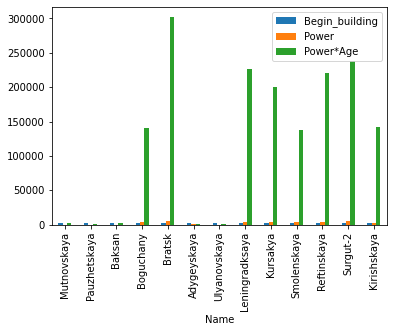

In [ ]:
# построение графика для датафрейма (всех столбцов (серий) имеющих численне значения) функцией plot
# параметр (kind = 'bar') - указывает на тип графика, в данном случае это столбчатая диаграмма
# в данном случае график неинформативен, поскольку данные имеют большой разброс
tmp_df.plot(kind = 'bar')
print()

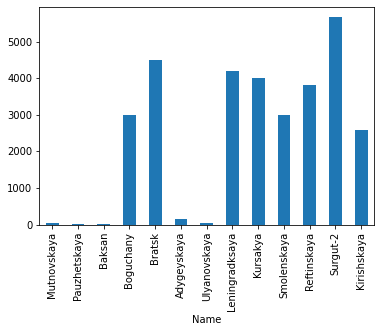

In [ ]:
# построение столбчатой диаграммы для столбца (серии) 'Power'
tmp_df['Power'].plot(kind = 'bar')

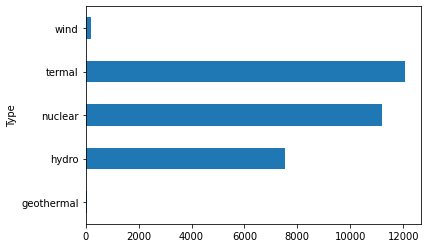

In [ ]:
# группировка суммарных значений столбца (серии) 'Power' по значениям столбца (серии) 'Type'
# построение столбчатой горизонтальной диаграммы используя параметр (kind = 'barh')
tmp_df.groupby(['Type'])['Power'].sum().plot(kind = 'barh')

### Create by code

In [ ]:
# создание датафрейма df используя функцию pd.DataFrame()
# имеющего столбцы (серии) 'Name', 'Power', 'Owner' и стандартную индексацию
df = pd.DataFrame({
    'Name': ['PS1', 'PS2', 'PS3'],
    'Power_MW': [500, 1200, 480],
    'Owner': ['CVX', 'NEE', 'NEE']
})

In [ ]:
# отображение созданного датафрейма
df

,Name,Power_MW,Owner
0,PS1,500,CVX
1,PS2,1200,NEE
2,PS3,480,NEE


In [ ]:
# создание датафрейма df используя функцию pd.DataFrame()
# имеющего столбцы (серии) 'Power', 'Owner' и идексацию 'PS1', 'PS2', 'PS3'
df = pd.DataFrame({
    'Power_MW': [500, 1200, 480],
    'Owner': ['CVX', 'NEE', 'NEE']}, 
    index = ['PS1', 'PS2', 'PS3'])
# отображение датафрейма
df

,Power_MW,Owner
PS1,500,CVX
PS2,1200,NEE
PS3,480,NEE


In [ ]:
# присвоение индексам отдельного имени используя метод index.name
df.index.name = 'Name'
# отображение датафрейма
df

,Power_MW,Owner
Name,,
PS1,500,CVX
PS2,1200,NEE
PS3,480,NEE


In [ ]:
# создание массива состоящего из двух массивов чисел
source_data = np.array([[1, 2, 3], [4, 5, 6]])
# преобразание массивов в датафрейм, используя функцию pd.DataFrame
# присваивая столбцу 'C1' значения первого массива, 'C2' - второго
df = pd.DataFrame({'C1': source_data[0], 'C2': source_data[1]})
# отображение полученного датафрейма
df

,C1,C2
0,1,4
1,2,5
2,3,6


In [ ]:
# создание датафрейма используя цикл
# задание начального id столбца 
column_id = 1
# создание временного словаря
tmp_dict = {}
# цикл проходящий по элементам созданного ранее массива source_data, который состоит из двух массивов чисел
for row in source_data:
  # формирование словаря, столбец = массив
  tmp_dict['C' + str(column_id)] = row
  # счётчик id стобцов
  column_id += 1

# преобразование сформированного словаря в датафрейм
df = pd.DataFrame(tmp_dict)
# отображение датафрейма
df

,C1,C2
0,1,4
1,2,5
2,3,6


In [ ]:
# присвоение переменной matrix значений из датафрейма df
matrix = df.values
# отображение массива (матрицы)
matrix

array([[1, 4],
       [2, 5],
       [3, 6]])

### Save to file

In [ ]:
# формирование датафрейма
df = pd.DataFrame({
    'Name': ['PS1', 'PS2', 'PS3'],
    'Power_MW': [500, 1200, 480],
    'Owner': ['CVX', 'NEE', 'NEE']
})

# сохранение датафрейма в формате csv 'test_csv_saving.csv' имеющего разделители столбцов ';'
df.to_csv('test_csv_saving.csv', sep = ';')

In [ ]:
# сохранение датафрейма в формате excel 'test_csv_saving.xlsc'
# параметр (sheet_name = 'n1') - указывает на название сохраняемого листа в excel
# параметр (index = False) - указывает на удаление исходных индексов при сохранении в excel
df.to_excel('test_excel_saving.xlsx', sheet_name = 'n1', index = False)

In [ ]:
# сохранение данных в формате excel на подключенный google disk
df.to_excel('gdrive/My Drive/Pandas/s.xlsx')

# 'gdrive/My Drive/Халясмаа/08.2020/s.xlsx'